In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [76]:
# Load the dataset
df = pd.read_csv("../../data/Ohio2020_processed/train/540-ws-training_processed.csv")
df["5minute_intervals_timestamp"] = df["5minute_intervals_timestamp"] - df["5minute_intervals_timestamp"][0]
display(df)

df['cbg'] = df['cbg'].interpolate(method='linear')

,5minute_intervals_timestamp,missing_cbg,cbg,finger,basal,hr,gsr,carbInput,bolus
0,0.00000,0.0,76.0,80.0,NaN,NaN,0.337214,NaN,NaN
1,1.00008,0.0,72.0,NaN,NaN,NaN,0.317671,NaN,NaN
2,2.00016,0.0,68.0,NaN,NaN,NaN,0.342821,NaN,NaN
3,3.00024,0.0,65.0,NaN,NaN,NaN,0.359941,NaN,NaN
4,4.00032,0.0,63.0,NaN,NaN,NaN,0.365833,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13104,13105.04968,0.0,255.0,NaN,0.8,NaN,NaN,NaN,NaN
13105,13106.04976,0.0,258.0,NaN,0.8,NaN,NaN,NaN,NaN
13106,13107.04984,0.0,258.0,NaN,0.8,NaN,NaN,NaN,NaN
13107,13108.04992,0.0,257.0,NaN,0.8,NaN,NaN,NaN,NaN


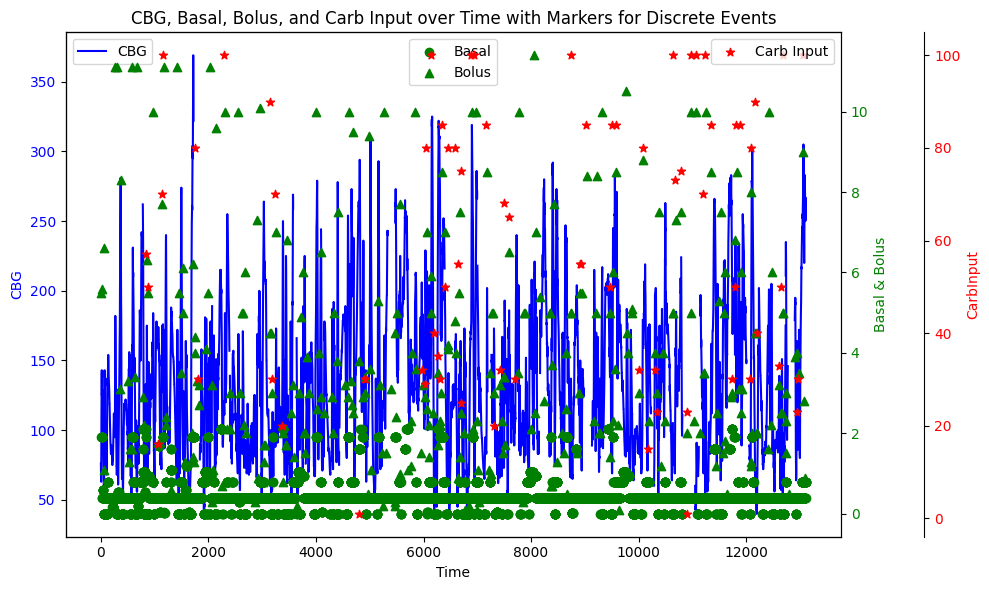

In [64]:
# Set up the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot CBG on the first y-axis as a line
ax1.plot(df['5minute_intervals_timestamp'], df['cbg'], color='b', label='CBG')
ax1.set_xlabel('Time')
ax1.set_ylabel('CBG', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for basal & bolus
ax2 = ax1.twinx()
ax2.set_ylabel('Basal & Bolus', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Plot basal as discrete points
ax2.scatter(df['5minute_intervals_timestamp'], df['basal'], color='g', label='Basal', marker='o')
ax2.scatter(df['5minute_intervals_timestamp'], df['bolus'], color='g', label='Bolus', marker='^')

# Create a third y-axis for carbInput
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis outward

# Plot carbInput as discrete points 
ax3.scatter(df['5minute_intervals_timestamp'], df['carbInput'], color='red', label='Carb Input', marker='*')
ax3.set_ylabel('CarbInput', color='r')
ax3.tick_params(axis='y', labelcolor='r')

# Add a legend to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')
ax3.legend(loc='upper right')

# Show the plot
plt.title('CBG, Basal, Bolus, and Carb Input over Time with Markers for Discrete Events')
plt.tight_layout()
plt.show()

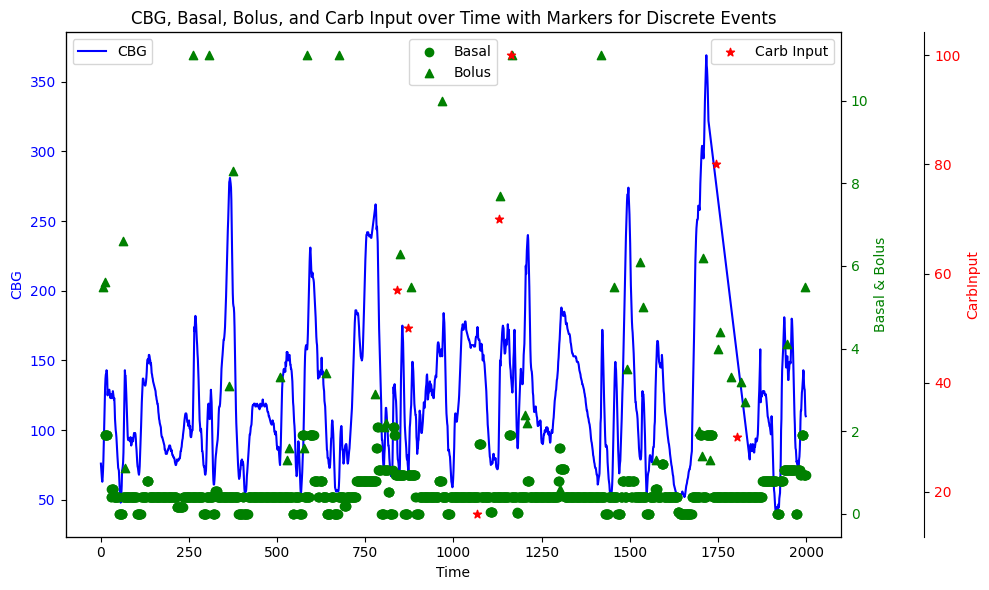

In [77]:
# Set up the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot CBG on the first y-axis as a line
ax1.plot(df['5minute_intervals_timestamp'][:2000], df['cbg'][:2000], color='b', label='CBG')
ax1.set_xlabel('Time')
ax1.set_ylabel('CBG', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for basal & bolus
ax2 = ax1.twinx()
ax2.set_ylabel('Basal & Bolus', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Plot basal as discrete points
ax2.scatter(df['5minute_intervals_timestamp'][:2000], df['basal'][:2000], color='g', label='Basal', marker='o')
ax2.scatter(df['5minute_intervals_timestamp'][:2000], df['bolus'][:2000], color='g', label='Bolus', marker='^')

# Create a third y-axis for carbInput
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis outward

# Plot carbInput as discrete points 
ax3.scatter(df['5minute_intervals_timestamp'][:2000], df['carbInput'][:2000], color='red', label='Carb Input', marker='*')
ax3.set_ylabel('CarbInput', color='r')
ax3.tick_params(axis='y', labelcolor='r')

# Add a legend to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')
ax3.legend(loc='upper right')

# Show the plot
plt.title('CBG, Basal, Bolus, and Carb Input over Time with Markers for Discrete Events')
plt.tight_layout()
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 2299.2471674436874
R² Score: 0.16711445509259204


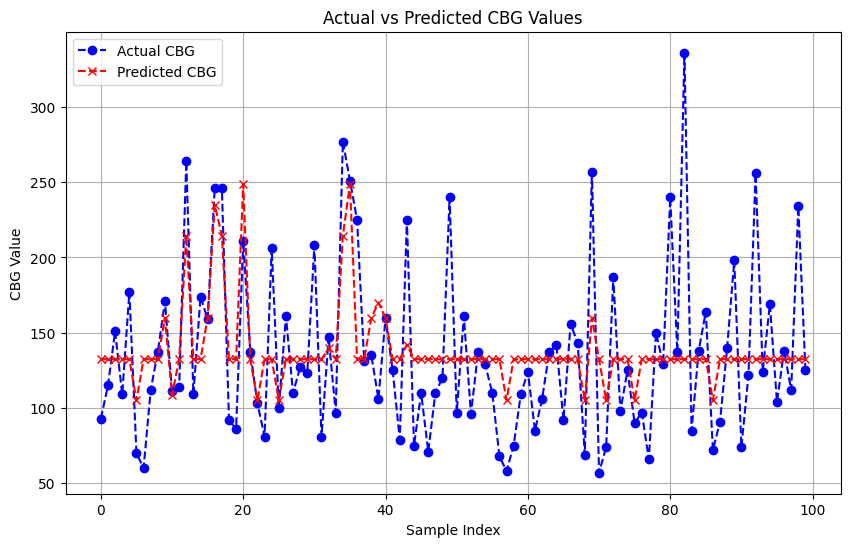

In [75]:
# Select relevant features and target variable
# Here we use basal, bolus, carbInput, hr, gsr as predictors
X = df[['basal', 'bolus', 'carbInput']]  # Add or remove columns as needed
y = df['cbg']

# Fill NaN in 'carbInput', 'bolus', and 'basal' columns with 0
df[['carbInput', 'bolus', 'basal']] = df[['carbInput', 'bolus', 'basal']].fillna(0)

# Impute missing values in the target (cbg) if necessary
# Reshape y to a 2D array
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))

# Reshape y back to 1D after imputation
y_imputed = y_imputed.ravel()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_imputed, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot the real vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test[0:100], label='Actual CBG', color='blue', marker='o', linestyle='dashed')
plt.plot(y_pred[0:100], label='Predicted CBG', color='red', marker='x', linestyle='dashed')

plt.title('Actual vs Predicted CBG Values')
plt.xlabel('Sample Index')
plt.ylabel('CBG Value')
plt.legend()
plt.grid(True)
plt.show()